In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

### Part I: Using PCA to project 2-D data onto its principal axes

In [14]:
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)

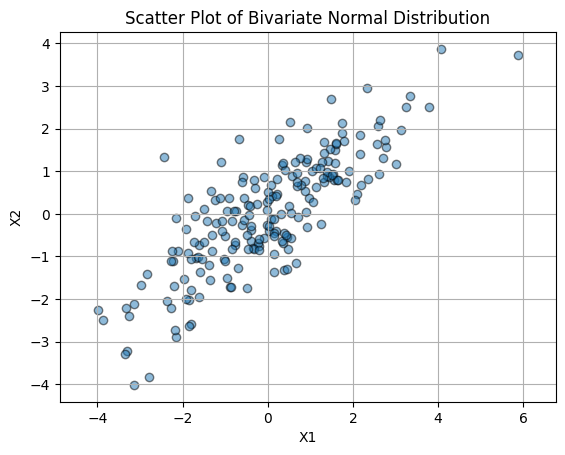

In [15]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', alpha=0.5)
plt.title('Scatter Plot of Bivariate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.grid(True)
plt.show()

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [17]:
components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

In [18]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

The 1st component explains about 90% of data while the 2nd component explains about 9% of data.

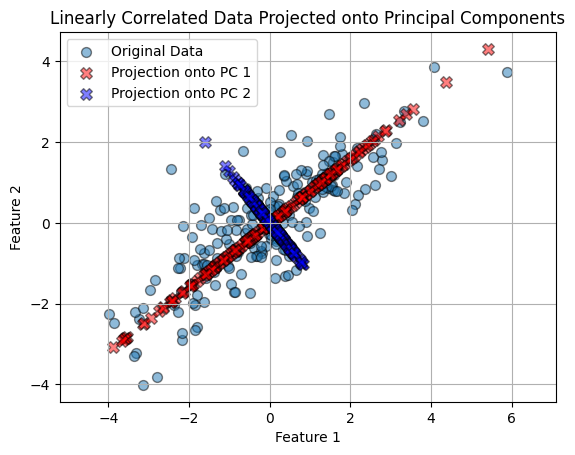

In [19]:
proj_pc1 = np.dot(X, components[0])
proj_pc2 = np.dot(X, components[1])

x_pc1 = proj_pc1 * components[0][0]
y_pc1 = proj_pc1 * components[0][1]
x_pc2 = proj_pc2 * components[1][0]
y_pc2 = proj_pc2 * components[1][1]

plt.figure()
plt.scatter(X[:, 0], X[:, 1], label="Original Data", ec='k', s=50, alpha=0.5)

plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

The data varies in 2 directions:
1. The 1st direction, in red, is aligned in the direction having the widest variation.
2. The 2nd direction, in blue, is perpendicular to 1st and has lower variance.

### Part II. PCA for feature space dimensionality reduction

In [20]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

s_sc = StandardScaler()
X_scaled = s_sc.fit_transform(X)

In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

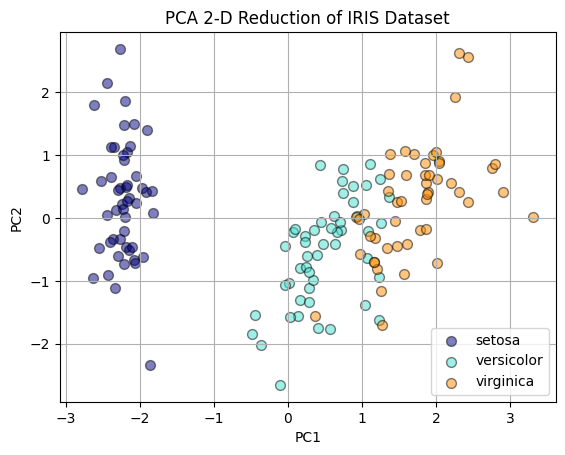

In [24]:
plt.figure()#
colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=50, ec='k', alpha=0.5, lw=lw, label=target_name)

plt.title('PCA 2-D Reduction of IRIS Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best', shadow=False, scatterpoints=1,)
plt.grid(True)
plt.show()

### Reinitialize the PCA model without reducing the dimension

In [26]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

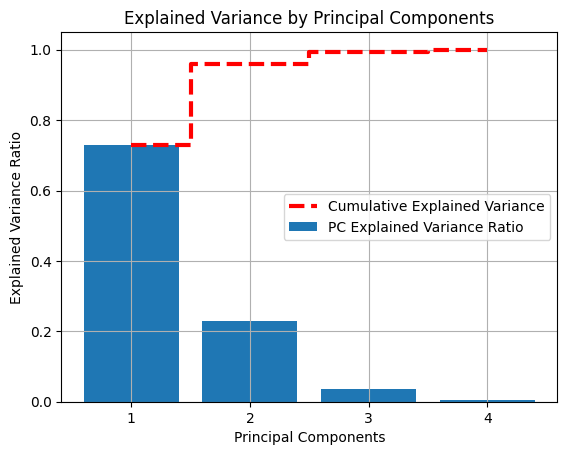

In [27]:
evr = pca.explained_variance_ratio_

plt.figure()
plt.bar(x=range(1, len(evr) + 1), height=evr, alpha=1, align='center', label='PC Explained Variance Ratio')
plt.ylabel("Explained Variance Ratio")
plt.xlabel('Principal Components')
plt.title("Explained Variance by Principal Components")

cumulative_variance = np.cumsum(evr)
plt.step(range(1, 5), cumulative_variance, where='mid', linestyle='--', lw=3, color='red', label='Cumulative Explained Variance')
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()